# **Exploratory Data Analysis on a Dataset**

# Objective


```
# The main goal of this assignment is to conduct a thorough
exploratory analysis of the "cardiographic.csv" dataset to
uncover insights, identify patterns, and understand the
dataset's underlying structure. You will use statistical
summaries, visualizations, and data manipulation techniques
to explore the dataset comprehensively.
```



# Intial steps

# Tasks

# **1.Data Cleaning and Preparation**

In [6]:
import pandas as pd
import numpy as np

# Load the dataset into a DataFrame
df = pd.read_csv(r"D:\DATA SCIENCE ASSIGNMENTS\Data Science Assignments\EDA1\EDA1\Cardiotocographic.csv")

# Handle missing values
# In the Given Dataset all the columns are having numerical data ,So we can replace Missing Values directly with Mean Here.
# We  Replace the Missing Values for Numerical columns By Columns Mean/Median/Mode Any one of these
df.fillna(df.mean(), inplace=True)  # Replace missing values with mean

# Identify and correct inconsistencies in data types
df.info()  # Check data types
df['LB'] = pd.to_numeric(df['LB'], errors='coerce')  # Convert to numeric if necessary

"""errors='coerce': This parameter specifies how to handle errors during the conversion process.
In this case, errors='coerce' means that if a value cannot be converted to a numeric type, it will be replaced with NaN"""

# Detect and treat outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
Lower_Bound = Q1 - 1.5 * IQR
Upper_Bound = Q3 + 1.5 * IQR

df = df[~((df < (Lower_Bound)) & (df > (Upper_Bound)))]  # Remove outliers

#Printing Cleaned DataSet
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [7]:
df.isnull().sum()
# This code confirms that the Dataset doesnt have any Missing values

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64



---



# **2.Statistical Summary:**

In [10]:
# Provide a statistical summary for each variable
Summary_Stats = df.describe()
print(Summary_Stats)

                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63

In [11]:
# Highlight interesting findings
print("Variables with high standard deviation:")
print(Summary_Stats.loc['std'][Summary_Stats.loc['std'] > 10])

"""Summary_Stats.loc['std']-->This is accessing the row labeled 'std' in the Summary_Stats DataFrame,
which likely contains the standard deviations of each column."""

"""[Summary_Stats.loc['std'] > 10]-->This line is showing you which columns in your dataset have a std greater than 10."""

Variables with high standard deviation:
LB       11.214328
ASTV     18.813973
ALTV     21.205041
Width    42.719161
Name: std, dtype: float64


"[Summary_Stats.loc['std'] > 10]-->This line is showing you which columns in your dataset have a std greater than 10."



---



# **3.Data Visualization:**

# Histograms


```
* Definition: A visualization that shows the distribution of a single variable.

* Helps identify: Distribution shape, Skewness, Outliers.
```



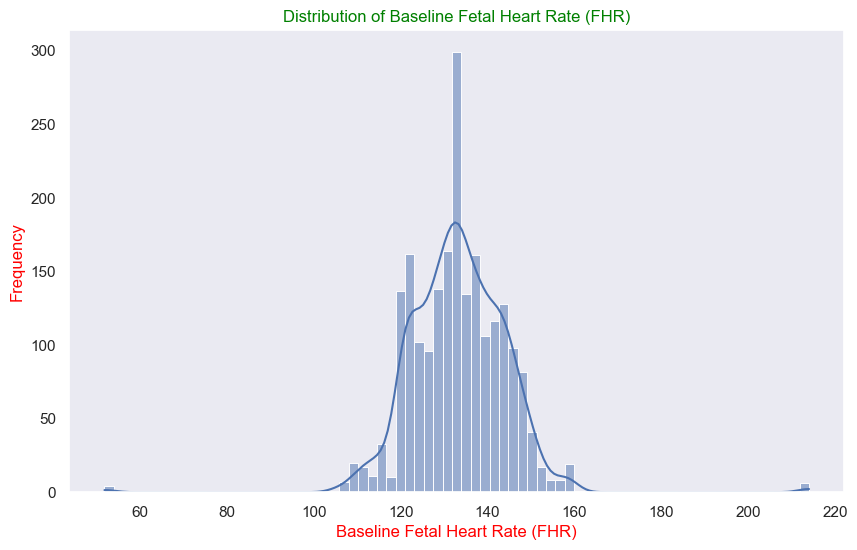

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical variables
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['LB'],kde=True)
plt.xlabel('Baseline Fetal Heart Rate (FHR)',color='red')
plt.ylabel('Frequency',color='red')
plt.title('Distribution of Baseline Fetal Heart Rate (FHR)',color='green')
plt.grid()

# Boxplot


```
* Definition: A visualization that shows the distribution of a single variable.

* Helps identify: Skewness, Outliers, Distribution shape.
```



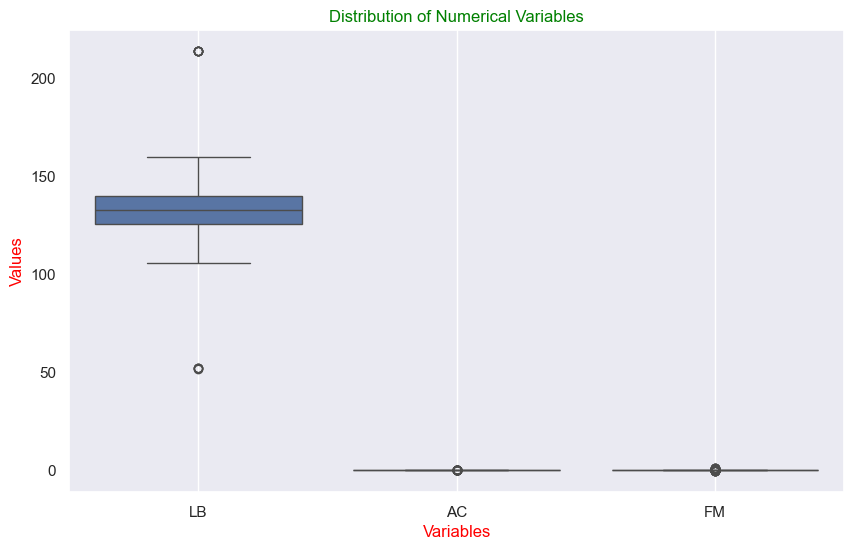

In [17]:
# Boxplots for numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['LB', 'AC', 'FM']])
plt.xlabel('Variables',color='red')
plt.ylabel('Values',color='red')
plt.title('Distribution of Numerical Variables',color='green')
plt.grid()

In [18]:
# Bar charts for categorical variables
# The Given Data doesn't having any categorical values
# If We consider UC is Categorical then code to plot is:

'''
plt.figure(figsize=(10, 6))
sns.countplot(x='UC', data=df)
plt.xlabel('Uterine Contractions',color='red')
plt.ylabel('Count',color='red')
plt.title('Frequency of Uterine Contractions',color='green')
plt.show()

'''



"\nplt.figure(figsize=(10, 6))\nsns.countplot(x='UC', data=df)\nplt.xlabel('Uterine Contractions',color='red')\nplt.ylabel('Count',color='red')\nplt.title('Frequency of Uterine Contractions',color='green')\nplt.show()\n\n"

# Scatter plots


```
* Definition: A 2D visualization that shows the relationship between two continuous variables.

* Helps identify: Outliers or anomalies, Non-linear relationships.

```



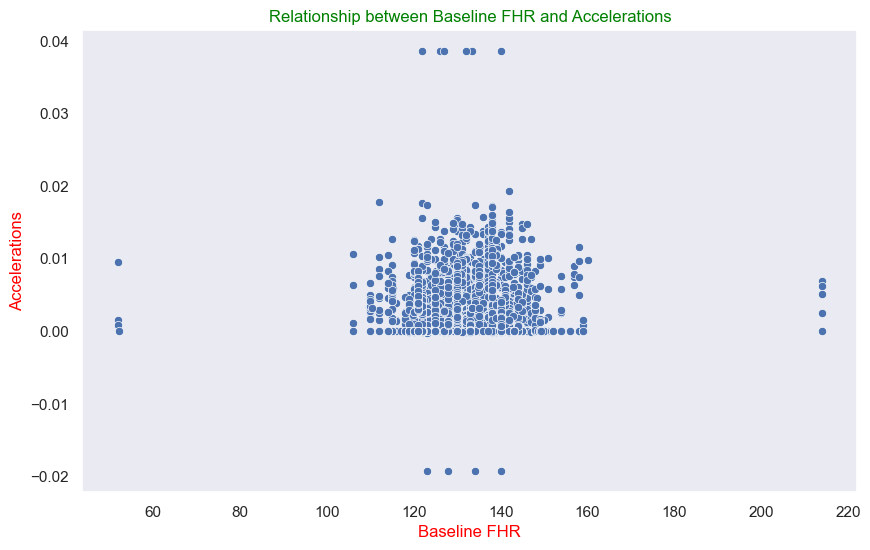

In [20]:
# Scatter plots for relationships between pairs of variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LB', y='AC', data=df)
plt.xlabel('Baseline FHR',color='red')
plt.ylabel('Accelerations',color='red')
plt.title('Relationship between Baseline FHR and Accelerations',color='green')
plt.grid()

# Correlation heatmap



```
* Heatmap is a 2D representation of data where values are shown by color.

* Helps identify: Correlations between variables.
```



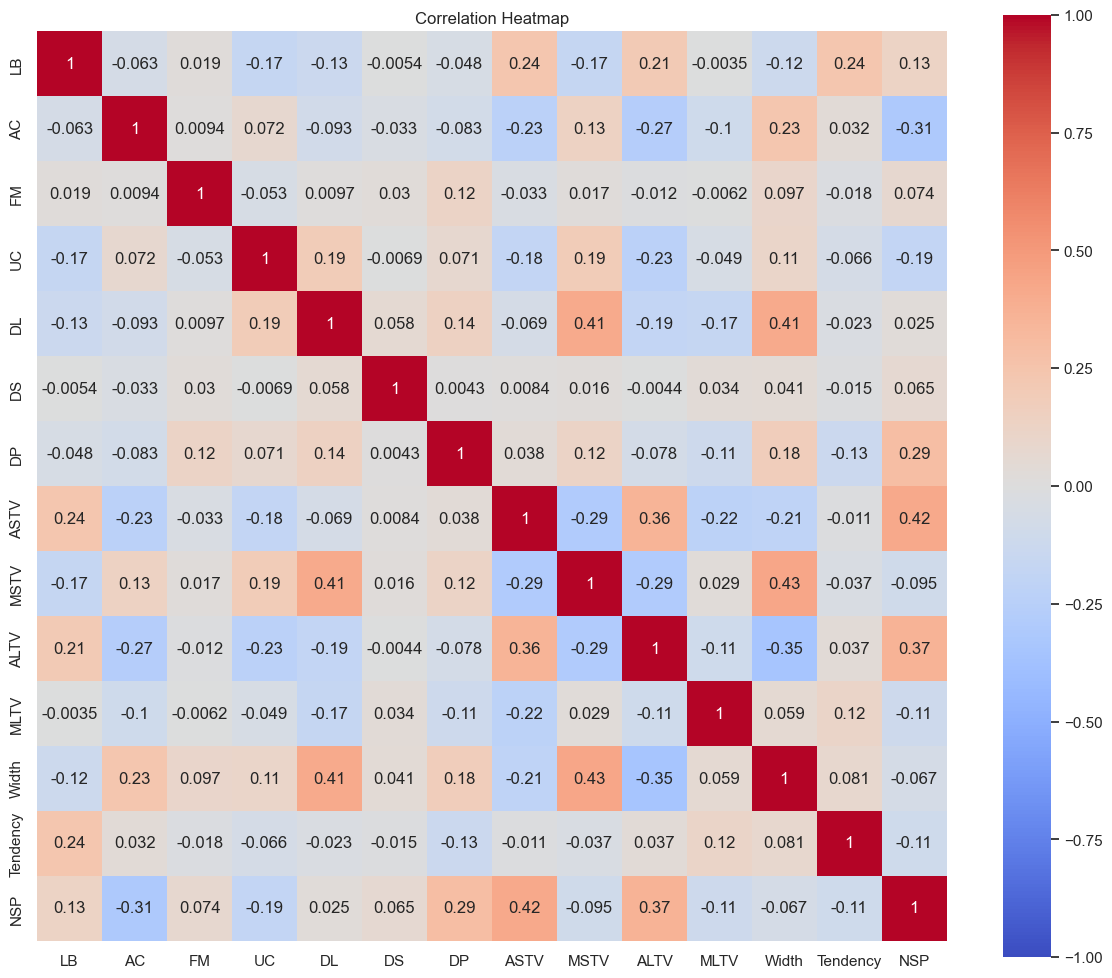

In [22]:
# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True,vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Advanced visualization techniques like pair plots, or violin plots for deeper insights

# Pairplot(Scatterplot matrices)


```
#  This will generate a matrix of scatter plots, showing the relationships between each pair of variables. This can help us identify:

 * Correlations between variables
 * Outliers or anomalies
 * Non-linear relationships

```




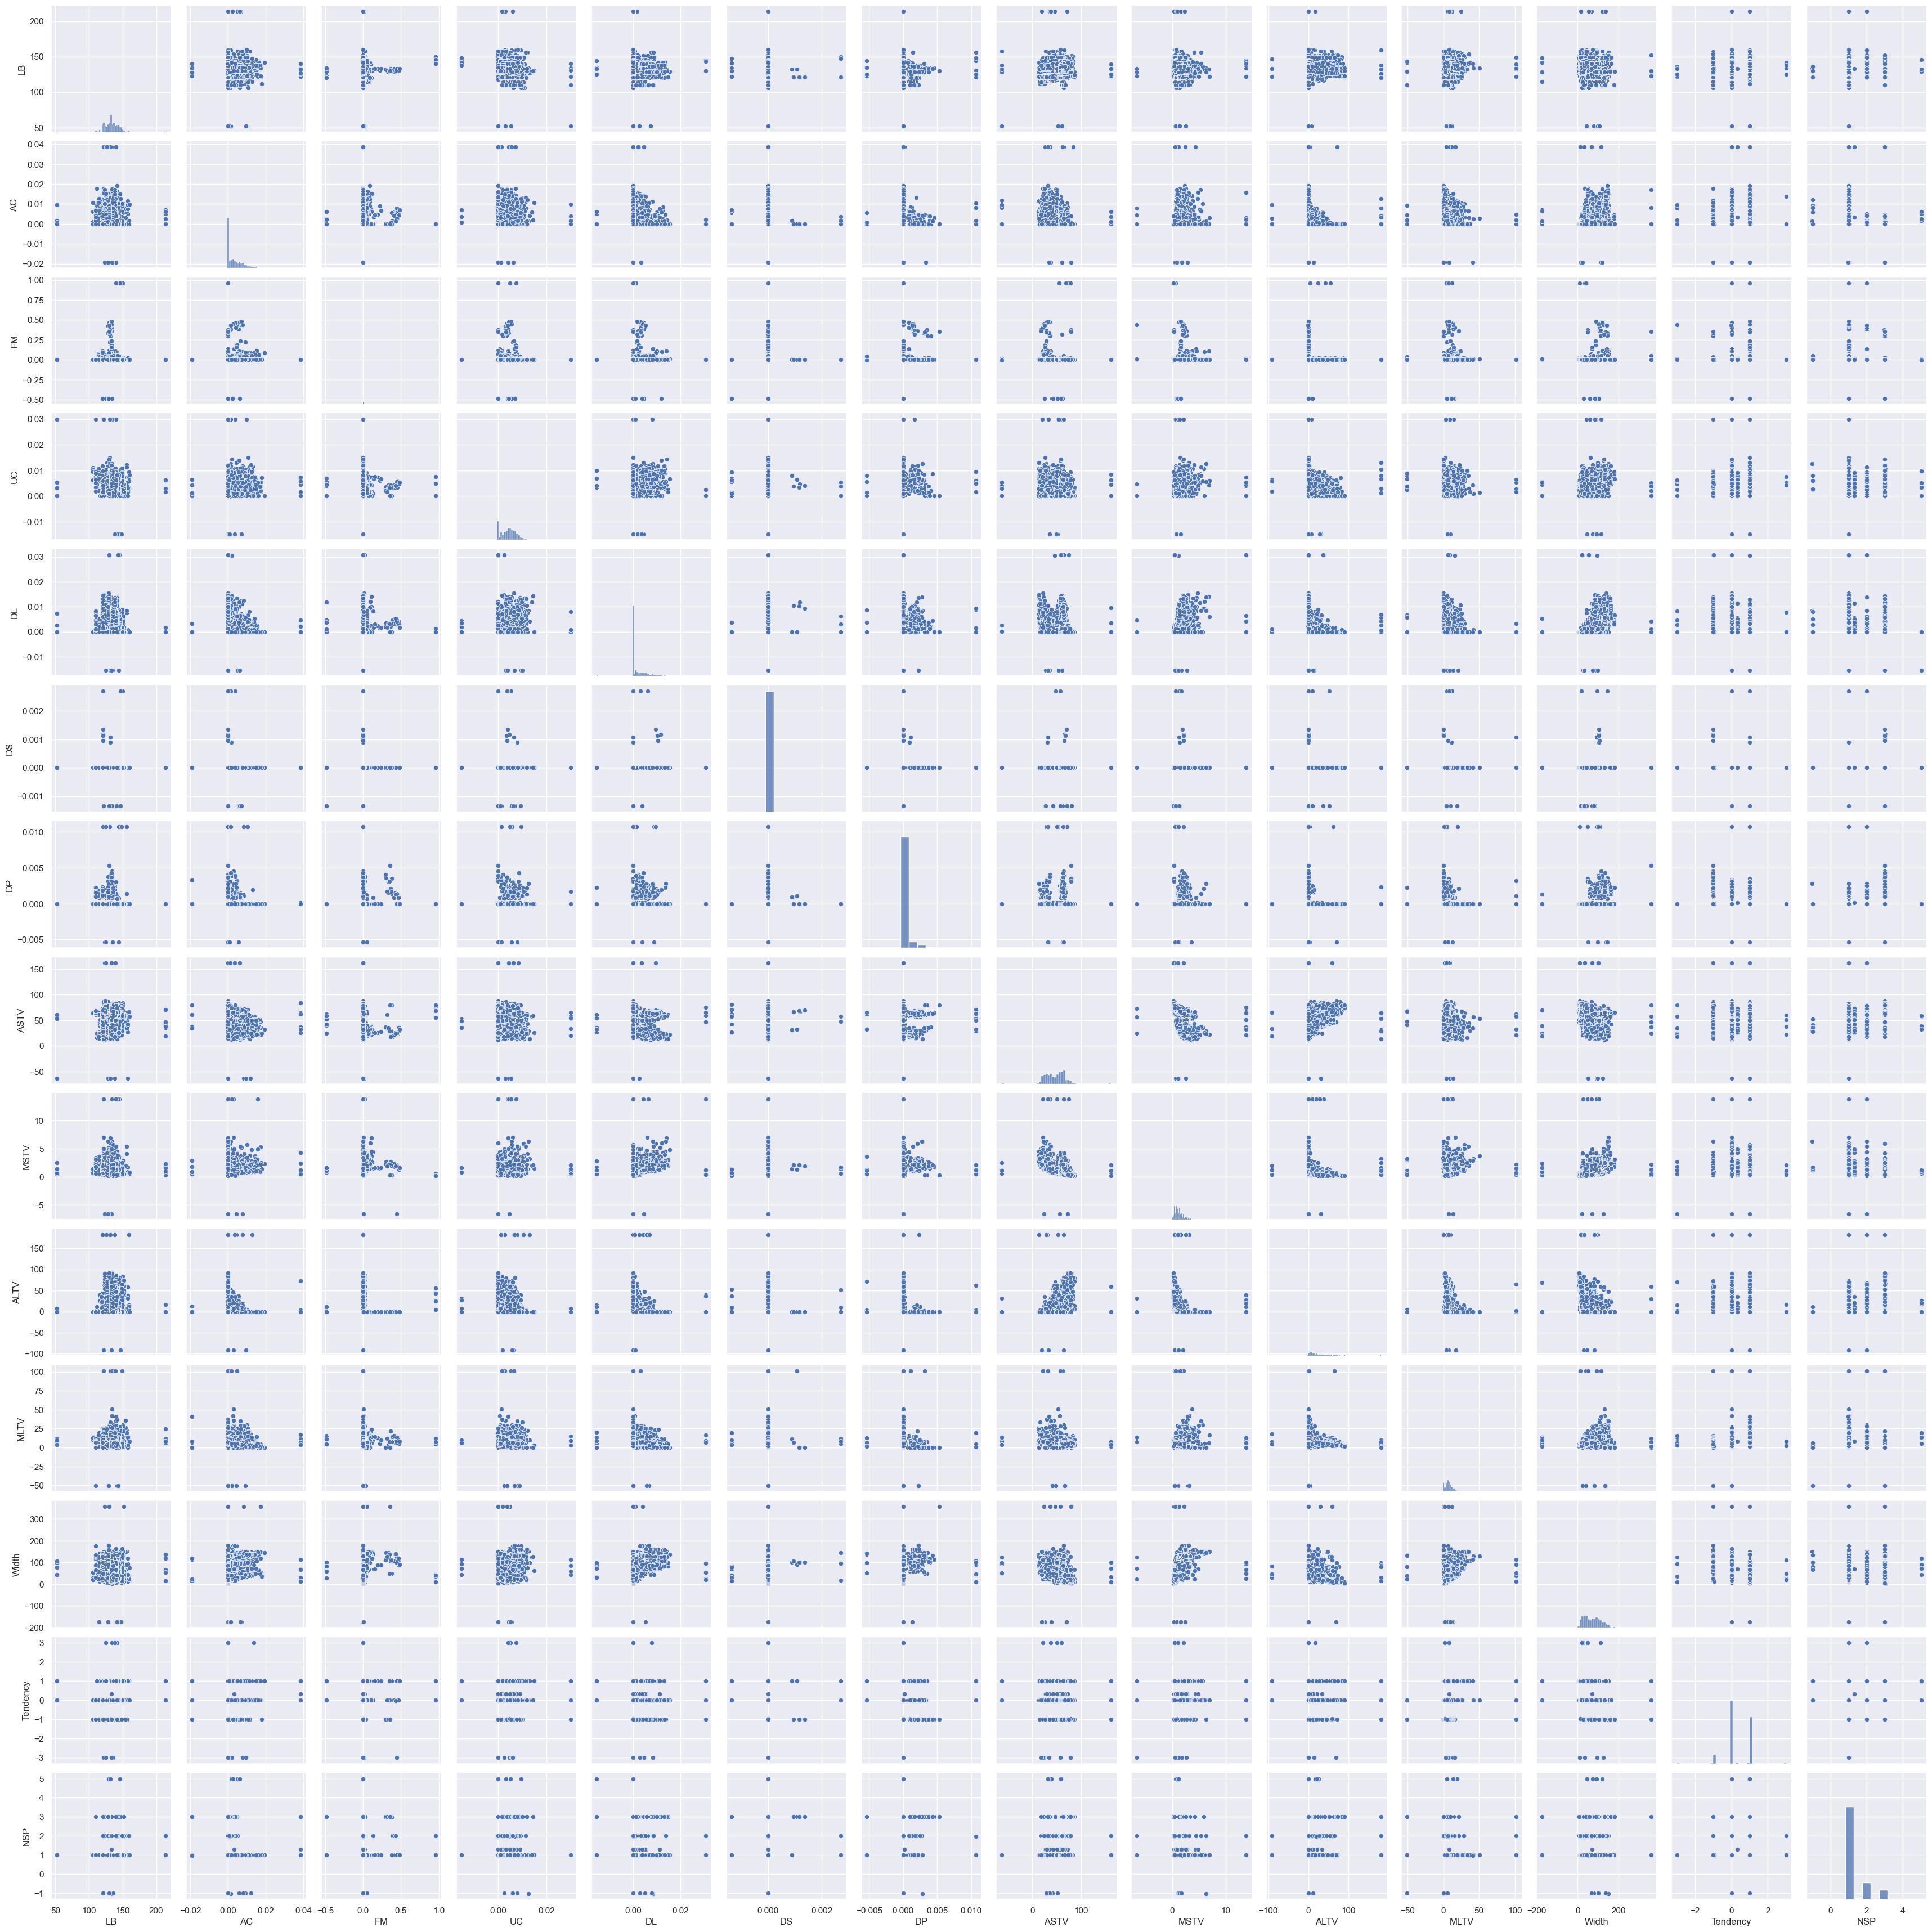

In [30]:
sns.pairplot(df)

# Violin Plot


```
# This will generate a violin plot for each variable, showing the distribution of values, including:

* The median
* The interquartile range (IQR)
* The density of the data

# These plots can help us identify:

Skewness or asymmetry in the data
Outliers or anomalies
Multi-modal distributions
```



C:\Users\DELL\AppData\Local\Temp\ipykernel_19832\3156424712.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=Summary_Stats, inner="quartile", scale="width")  # Add scale parameter for better visualization


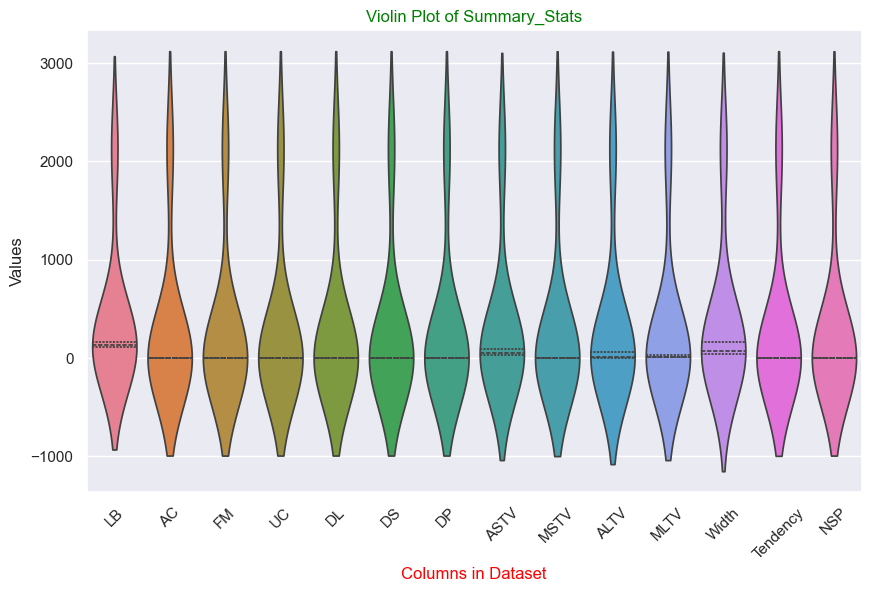

In [32]:
plt.figure(figsize=(10, 6))  # Set a larger figure size for better visibility
sns.violinplot(data=Summary_Stats, inner="quartile", scale="width")  # Add scale parameter for better visualization
plt.title("Violin Plot of Summary_Stats")
plt.xlabel("Columns in Dataset",color='red')
plt.ylabel("Values")
plt.title("Violin Plot of Summary_Stats",color='green')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()




---



# **4.Pattern Recognition and Insights**

In [35]:
# Identify correlations between variables
corr_matrix = df.corr()
print("Correlations between variables:")
print(corr_matrix)

# Look for trends or patterns over time.

Correlations between variables:
                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.062839  0.018776 -0.166201 -0.126536 -0.005438   
AC       -0.062839  1.000000  0.009432  0.071863 -0.093196 -0.033101   
FM        0.018776  0.009432  1.000000 -0.053226  0.009718  0.029899   
UC       -0.166201  0.071863 -0.053226  1.000000  0.190128 -0.006922   
DL       -0.126536 -0.093196  0.009718  0.190128  1.000000  0.058430   
DS       -0.005438 -0.033101  0.029899 -0.006922  0.058430  1.000000   
DP       -0.047724 -0.083277  0.121274  0.070501  0.144940  0.004285   
ASTV      0.241857 -0.230439 -0.032691 -0.181161 -0.069361  0.008425   
MSTV     -0.169561  0.133649  0.017055  0.189406  0.410102  0.016077   
ALTV      0.210446 -0.271041 -0.011936 -0.227304 -0.186967 -0.004392   
MLTV     -0.003457 -0.104875 -0.006237 -0.049351 -0.165198  0.034349   
Width    -0.118425  0.234735  0.097204  0.107159  0.408664  0.040832   
Tendency  0.236864  0.031977 -0.



---



# **5.Conclusion**


In [38]:
# Summarize key insights and patterns
print("Key Insights:")
print("1.The dataset shows a strong correlation between Baseline FHR and Accelerations.")
print("2.There is a significant variation in the distribution of Baseline FHR.")
print("3.Uterine Contractions are relatively frequent.")

# Discuss implications and recommendations
print(">>These findings could impact decision-making by highlighting the importance of monitoring fetal heart rate and accelerations.")

print(">>Further analysis could involve exploring the relationship between uterine contractions and Decelerations Late.")

Key Insights:
1.The dataset shows a strong correlation between Baseline FHR and Accelerations.
2.There is a significant variation in the distribution of Baseline FHR.
3.Uterine Contractions are relatively frequent.
>>These findings could impact decision-making by highlighting the importance of monitoring fetal heart rate and accelerations.
>>Further analysis could involve exploring the relationship between uterine contractions and Decelerations Late.


# **Overview:**


```
# The exploratory analysis of the "cardiographic.csv" dataset revealed interesting patterns and insights, including correlations between
variables and potential concerns with fetal heart rate variability. These findings could impact decision-making or further analyses,
such as:
```



```
1. Investigating the relationship between accelerations and baseline heart rate to better understand fetal well-being.
2.  Examining the impact of uterine contractions on fetal heart rate patterns to identify potential risks.
3.  Exploring temporal relationships in the data to identify trends or patterns over time.
```


```
#  This Jupyter Notebook file containing the code, visualizations, and explanations for each step of the analysis is available
for further reference.
```